<a href="https://colab.research.google.com/github/tianhanl0/38610/blob/main/Lecture_5_SciPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SciPy 
Refer to the SCiPy documentation at:

* SciPy User Guide: https://docs.scipy.org/doc/scipy/reference/tutorial/index.html
* SciPy API Guide: https://docs.scipy.org/doc/scipy/reference/index.html

## Special Functions (scipy.special)

There are a number of built-in functions that are used in mathematical physics

A full list of the functions available in scipy.special can be found at [here](https://docs.scipy.org/doc/scipy/reference/special.html).

For example... a gamma function...

In [1]:
import scipy.special as special
import numpy as np
import matplotlib.pyplot as plt

#magic command that add
%matplotlib inline

In [2]:
x = special.gamma([0, 0.5, 1.0, 5.0])
x

array([        inf,  1.77245385,  1.        , 24.        ])

In [3]:
z = 2.5 + 1j
special.gamma(z)

(0.7747621045510842+0.7076312043795936j)

# Statistics (scipy.stats)

Scipy comes with a wide array of statistics functionality and methods.

For a full list of the methods available, see the [documentation](https://docs.scipy.org/doc/scipy/reference/reference/stats.html#module-scipy.stats).

Here are few examples

You can work with distributions...

In [4]:
import scipy.stats as stats

# Normal Continuous distribution functions
a = np.array([-1.,0.,1.])
c = stats.norm.cdf(a)

# get Random numbers from a normal distribution
r = stats.norm.rvs(5, size=10)

%whos

Variable   Type       Data/Info
-------------------------------
a          ndarray    3: 3 elems, type `float64`, 24 bytes
c          ndarray    3: 3 elems, type `float64`, 24 bytes
np         module     <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
plt        module     <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
r          ndarray    10: 10 elems, type `float64`, 80 bytes
special    module     <module 'scipy.special' f<...>ipy/special/__init__.py'>
stats      module     <module 'scipy.stats' fro<...>scipy/stats/__init__.py'>
x          ndarray    4: 4 elems, type `float64`, 32 bytes
z          complex    (2.5+1j)


Basic tests - t-tests and KS-tests

In [5]:
### random list
x = stats.t.rvs(10,size=1000) # Generate 1000 variables from the Student t distribution

### Distribution charateristics
m, v, s, k = stats.t.stats(10, moments='mvsk')

### Descriptive statistics
n, (smin, smax), sm, sv, ss, sk = stats.describe(x)

sstr = '%-14s mean = %6.4f, variance = %6.4f, skew = %6.4f, kurtosis = %6.4f'
print(sstr % ('distribution:', m, v, s ,k))
print(sstr % ('sample:', sm, sv, ss, sk))

t_test = stats.ttest_1samp(x,m)
print('t-statistic = %6.3f pvalue = %6.4f' % t_test)

k_test = stats.kstest(x, 't', (10,))
print("KS-statistic D = %6.3f pvalue = %6.4f" % (k_test))

distribution:  mean = 0.0000, variance = 1.2500, skew = 0.0000, kurtosis = 1.0000
sample:        mean = 0.0136, variance = 1.2310, skew = 0.2198, kurtosis = 1.0361
t-statistic =  0.388 pvalue = 0.6982
KS-statistic D =  0.017 pvalue = 0.9268


We can do Quasi-Monte Carlo (QMC) methods. Monte Carlo (MC) methods are a broad class of computational algorithms that repeatedly random sample distibutions to get results. 

They are particularly useful when you don't have an analytic solution to a problem. QMC is designed to produce a set of random samples that are not clumped but yet are still fairly uniform within the space. 

Here is an example where one can sets of random points determined by QMC using Sobol and Halton sequences.

/usr/local/lib/python3.7/dist-packages/scipy/stats/_qmc.py:1078: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  warnings.warn("The balance properties of Sobol' points require"


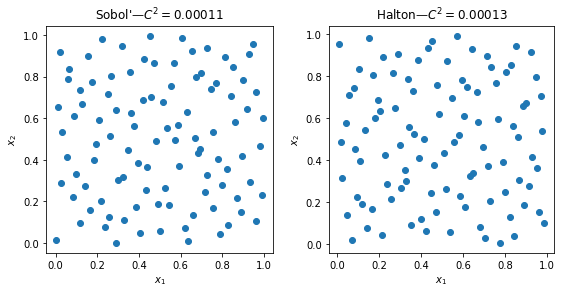

In [6]:
rng = np.random.default_rng()

n_sample = 100
dim = 2 

sample = {}

# Sobol'
engine = stats.qmc.Sobol(d=dim, seed=rng)
sample["Sobol'"] = engine.random(n_sample)

# Halton
engine = stats.qmc.Halton(d=dim, seed=rng)
sample["Halton"] = engine.random(n_sample)

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

for i, kind in enumerate(sample):
    axs[i].scatter(sample[kind][:, 0], sample[kind][:, 1])

    axs[i].set_aspect('equal')
    axs[i].set_xlabel(r'$x_1$')
    axs[i].set_ylabel(r'$x_2$')
    axs[i].set_title(f'{kind}—$C^2 = ${stats.qmc.discrepancy(sample[kind]):.2}')

plt.tight_layout()
plt.show()


### Integration (scipy.integrate)

This subpackage has a number of different integration techniques

A full list of the available functions can be at: https://docs.scipy.org/doc/scipy/reference/reference/integrate.html#module-scipy.integrate

For example, we can take the integral of a bessel function from the interval [0,4.5]

$$
 I = \int_0^{4.5} J_{2.5}(x)\,dx
$$

In [7]:
import scipy.integrate as integrate

result = integrate.quad(lambda x: special.jv(2.5,x),0,4.5)
result

(1.1178179380783253, 7.866317182537226e-09)

The first argument is always a calleable function, so if we wanted to take the integral of an arbitrary function:

$$
 I(a,b) = \int_0^1 ax^2 + b\,dx
$$

In [8]:
def integrand(x, a, b):
    return a*(x**2) + b

a = 2
b = 1
integrate.quad(integrand,0,1,args=(a,b))

(1.6666666666666667, 1.8503717077085944e-14)

You can even include infinity in your integration:

$$
 I(x) = \int_1^{\infty} \frac{e^{-xt}}{t^n}\,dt
$$

In [9]:
def integrand(t, n, x):
    return np.exp(-x*t) / t**n

integrate.quad(integrand,1,np.inf,args=(3.0,1.0))[0]

0.10969196719780967

One can do multiple integrations at once with `dblquad`, `tplquad` or `nquad`:

$$
 I = \int_0^{\infty} \int_1^{\infty} \frac{e^{-xt}}{t^{5.0}}\,dx = \frac{1}{n}
$$

In [10]:
def fun_1(t,  x):
    return np.exp(-x*t)/t**5.0

integrate.dblquad(fun_1, 0, np.inf, 1, np.inf)

(0.2000000000189363, 1.3682975855986131e-08)

In [11]:
integrate.nquad(fun_1,[[1,np.inf],[0,np.inf]])

(0.2000000000189363, 1.3682975855986131e-08)

Sample-based integration can be done through Simpson's rule

For example, let's integrate this function:

$$
 \int_1^4 x2\,dx = 21.0
$$

In [12]:
def f1(x):
    return x**2

x = np.array([1,3,4])
y = f1(x)

integrate.simpson(y,x)

21.0

One can also solve ordinary differential equations with the `solve_ivp` function.

Let's evluate the differential equation:

$$
\frac{dy}{dt} = f(y,t)
$$
$$
f(y,t) = -(1/2) y(t)
$$
$$
y(0) = 2.0
$$

In [13]:
def y(t, y):
    return -(1.0/2.0)*y

s = integrate.solve_ivp(y,[0, 10], [2])
s.t, s.y

(array([ 0.        ,  0.11488132,  1.26369452,  3.06074656,  4.81637262,
         6.57504937,  8.33467262, 10.        ]),
 array([[2.        , 1.88835583, 1.0632438 , 0.43316531, 0.18014905,
         0.07480841, 0.03105019, 0.01350782]]))

### Optimization (scipy.optimize)

One can do a bevy of different optimizations with Scipy.

See https://docs.scipy.org/doc/scipy/reference/reference/optimize.html#module-scipy.optimize for all of the available functions and methods.

One example would be to do an unconstrained minimization of multivariate scalar function with `minimize`.

Let's minimize a Rosenrock function of N variables

$$
f(x) = \sum_{i=1}^{N-1} 100(x_{i+1} - x_i^2)^2 + (1 - x_i)^2
$$

In [14]:
import scipy.optimize as optimize

def f(x):
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1.0-x[:-1])**2)
   

Let's use the Nelder-Mead Simplex method

In [15]:
x0 = np.array([1.3, 0.4, 0.8, 2.9, 1.2])
result = optimize.minimize(f,x0,method="nelder-mead", options={'xatol': 1e-8, 'disp':True})

print(result.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 497
         Function evaluations: 813
[1. 1. 1. 1. 1.]


### Interpolation

SciPy comes with 1-D and multi-dimensional interpolation techniques

For all of the available methods, see: https://docs.scipy.org/doc/scipy/reference/reference/interpolate.html#module-scipy.interpolate

A simple 1-D interpolation can be achieved through the `interp1d` method

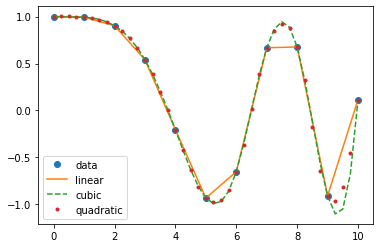

In [16]:
import scipy.interpolate as interpolate

x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)

f  = interpolate.interp1d(x, y, kind='linear')
f2 = interpolate.interp1d(x, y, kind='cubic')
f3 = interpolate.interp1d(x, y, kind='quadratic')

x_new = np.linspace(0, 10, num=41, endpoint=True)
plt.plot(x, y, 'o', x_new, f(x_new), '-', x_new, f2(x_new), '--', x_new, f3(x_new), '.')
plt.legend(['data', 'linear', 'cubic', 'quadratic'], loc='best')
plt.show()

### Fast Fourier Transforms

SciPy comes with 1-D, 2-D, and N-D fast Fourier Transforms through `scipy.fft`.

See https://docs.scipy.org/doc/scipy/reference/reference/fft.html#module-scipy.fft for full list of methods.

A basic 1-D FFT looks like the following:

In [17]:
from scipy.fft import fft, ifft

x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
y = fft(x)
yinv = ifft(y)

y, yinv

(array([ 4.5       -0.j        ,  2.08155948-1.65109876j,
        -1.83155948+1.60822041j, -1.83155948-1.60822041j,
         2.08155948+1.65109876j]),
 array([ 1. +0.j,  2. +0.j,  1. +0.j, -1. +0.j,  1.5+0.j]))

### Linear Algegra (scipy.linalg)

SciPy is built with LAPACK and BLAS libraries that provide very fast highly optimized linear algebra functionality.

For a full list of the functionality of `scipy.linalg`, which is quite extensive, see https://docs.scipy.org/doc/scipy/reference/reference/linalg.html#module-scipy.linalg.

We will show a few examples here...

Solving linear systems can be accomplished through the use of linalg.solve. Lets look at the set of equations:

$$
x + 3y + 5z = 10
$$
$$
2x + 5y + z = 8
$$
$$
2x + 3y + 8z = 3
$$

In [18]:
import scipy.linalg as linalg

A = np.array([[1, 3, 5],[2, 5, 1],[2, 3, 8]])
B = np.array([10, 8, 3])

x = linalg.solve(A,B)
x

array([-9.28,  5.16,  0.76])

Eigenvalue problems are very common in computatonal science. `scipy.linalg` provides a number of functions that can solve the general eigenvalue problem, as well as a number that are specific to different types of matrices.

For example, the `scipy.linalg.eig` solves the general problem

In [19]:
a = np.array([[1.0, 2.0, 3.0], [2.0, 3.0, 4.0], [3.0, 4.0, 5.0]])
eig_values, eig_vectors = linalg.eig(a)
print("eig_values = {}".format(eig_values))
print("eig_vectors = \t{}\n\t\t{}\n\t\t{}".format(eig_vectors[0],eig_vectors[1],eig_vectors[2]))

eig_values = [ 9.62347538e+00+0.j -6.23475383e-01+0.j  5.02863969e-16+0.j]
eig_vectors = 	[-0.38508979 -0.82767094  0.40824829]
		[-0.55951021 -0.14241368 -0.81649658]
		[-0.73393063  0.54284358  0.40824829]


### File IO functions 

Scipy comes with a robust set of tools to read a number of different file formats thorugh the scipy.io library.

To see all of the supported formats including Matlab matrix files, wav sournd files, etc., see: https://docs.scipy.org/doc/scipy/reference/reference/io.html#module-scipy.io

To read a netCDF file (a file with the extension `.nc`:

In [20]:
import scipy.io as sp_io
nc_file = sp_io.netcdf_file("sresa1b_ncar_ccsm3-example.nc")

print("Variables in the file are:")
for k,v in nc_file.variables.items():
    print("{}".format(k))

FileNotFoundError: ignored